# Project 1: Counting words in college subreddits

Due 2/11. Reminder that you are allowed to use any amount of AI assistance or outside resources with citation

## Part 1: word counting and bag of words

In [3]:
!pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl.metadata (5.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 49.2 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 57.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 54.2 MB/s eta 0:00:00
Using cached pyparsing-3.2.1-py3-none-any.whl (107 kB)


In [4]:
#install spacy in the current conda environment
!pip install spacy

  Using cached spacy_legacy-3.0.12-py2.py3-none-any.whl.metadata (2.8 kB)
  Using cached spacy_loggers-1.0.5-py3-none-any.whl.metadata (23 kB)
  Using cached wasabi-1.1.3-py3-none-any.whl.metadata (28 kB)
  Using cached catalogue-2.0.10-py3-none-any.whl.metadata (14 kB)
  Using cached weasel-0.4.1-py3-none-any.whl.metadata (4.6 kB)
  Using cached typer-0.15.1-py3-none-any.whl.metadata (15 kB)
  Using cached pydantic-2.10.6-py3-none-any.whl.metadata (30 kB)
  Using cached langcodes-3.5.0-py3-none-any.whl.metadata (29 kB)
  Using cached language_data-1.3.0-py3-none-any.whl.metadata (4.3 kB)
  Using cached annotated_types-0.7.0-py3-none-any.whl.metadata (15 kB)
  Using cached confection-0.1.5-py3-none-any.whl.metadata (19 kB)
  Using cached shellingham-1.5.4-py2.py3-none-any.whl.metadata (3.5 kB)
  Using cached rich-13.9.4-py3-none-any.whl.metadata (18 kB)
  Using cached cloudpathlib-0.20.0-py3-none-any.whl.metadata (14 kB)
  Using cached markdown_it_py-3.0.0-py3-none-any.whl.metadata (6.

In [5]:
!pip install scikit-learn

In [6]:
#download a small language model to help with cleaning tasks
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 51.6 MB/s eta 0:00:00 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [7]:
#import required libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import spacy
language_model = spacy.load("en_core_web_sm")
import matplotlib.pyplot as plt

import numpy as np

### Problem 1 and example: common words in the Michigan subreddit

In [8]:
#read the data from a csv file in the folder
mich=pd.read_csv("umich.csv")

In [9]:
#jupyter will print a pretty representation of most python objects if you just put the name
#we can see that the full text of each reddit comment is provided in the "text" column
mich

,Unnamed: 0,date,post_votes,text,user,com_votes
0,0,2024-09-04 15:33:20,2,"Zingermans has a nice reuben, pretty pricey bu...",Suspicious-Bad703,2
1,1,2024-09-04 15:33:20,2,I really love Tomokun!,webstbre000,2
2,2,2024-09-04 15:33:20,2,The Seoul is pretty good I especially like the...,iaxlmao,1
3,3,2024-09-04 15:33:20,2,A lot of it depends on what type of food and w...,I-696,1
4,4,2024-09-04 14:32:17,1,You can book completely enclosed private study...,sneep_,2
...,...,...,...,...,...,...
8334,8334,2024-07-02 12:35:36,9,It isn’t a student org,Vibes_And_Smiles,1
8335,8335,2024-07-02 11:07:10,0,Life \nMatter \nLife's matter,tctu,8
8336,8336,2024-07-02 11:07:10,0,google,SUPERazkari,4
8337,8337,2024-07-02 11:07:10,0,That’s a hard question to answer for a set of ...,Own-Resident-3837,-1


In [10]:
#this is a function that does some light cleaning, by removing newline characters, converting to lowercase, and removing punctuation

def clean(text):
    #remove newline and space characters
    text = ' '.join(text.split())
    #convert the text to lowercase
    text = text.lower()
    #remove punctuation
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    return text

In [11]:
#pandas allows us to quickly apply this cleaning function to all rows in a column
mich['cleaned_text'] = mich['text'].apply(clean)

In [12]:
#we can see the first comment after cleaning vs before
mich["cleaned_text"][0]

'zingermans has a nice reuben pretty pricey but the sammies are pretty big'

In [13]:
mich["text"][0]

'Zingermans has a nice reuben, pretty pricey but the sammies are pretty big'

In [14]:
#create a bag of words representation with count vectorizer
vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(mich['cleaned_text'])

In [15]:
#this is a sparse matrix, which is a more efficient way to store a matrix with many zeros
#the matrix has 8339 rows (one for each comment) and 15289 columns (one for each unique word in the dataset)
bag_of_words

<8339x15289 sparse matrix of type '<class 'numpy.int64'>'
	with 221217 stored elements in Compressed Sparse Row format>

In [16]:
#create a dataframe from the sparse matrix
#this is a more human-readable way to view the data
bow_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())
bow_df

,aa,aadl,aapd,aata,ab,abab,abandon,abandoned,abbreviation,abbreviations,...,zoned,zones,zoning,zoo,zoom,zoomer,zoomers,zuckerberg,𝓲𝓷𝓼𝓮𝓬𝓾𝓻𝓮,𝘢𝘩𝘦𝘮
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8334,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8335,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8336,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8337,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
#dataframes have a convenient method for summing the values in each column
#this will give us the number of times each word appears in the dataset
word_counts = bow_df.sum()
#we can sort the values to see the most common words
word_counts = word_counts.sort_values(ascending=False)

#notice that the top words are not very informative, as they are common words that appear in many contexts
#and bottom words include a lot of typos and other noise
word_counts

the            11306
to              8480
and             6921
you             6256
of              5028
               ...  
journals           1
journeywhen        1
jpg                1
js                 1
𝘢𝘩𝘦𝘮               1
Length: 15289, dtype: int64

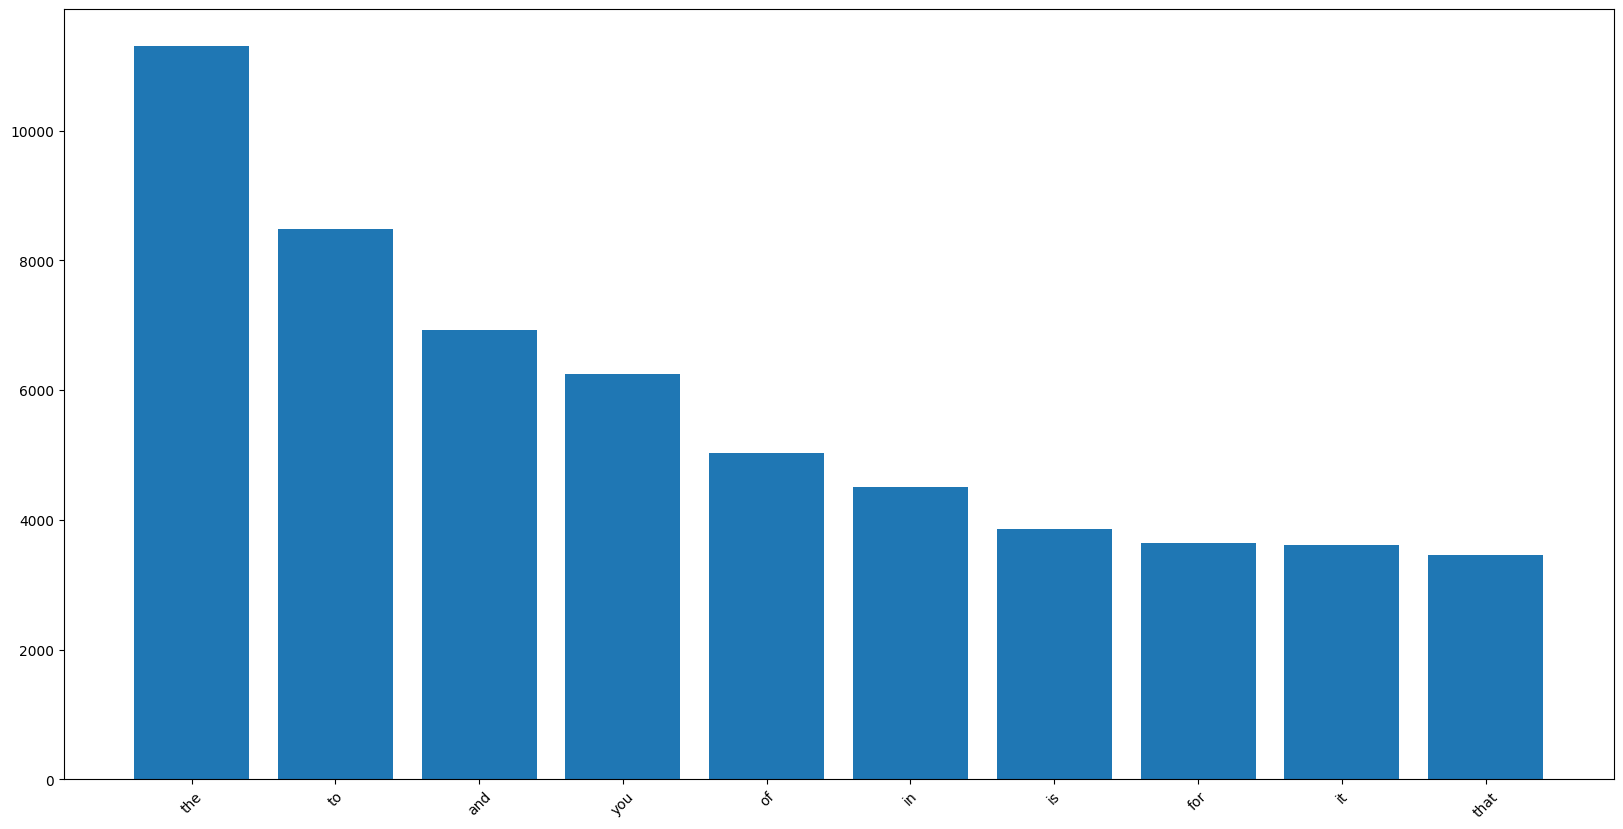

In [18]:
#we can plot the most common words
#we will only plot the top 10 words for readability
word_counts = word_counts.head(10)
plt.figure(figsize=(20,10))
plt.bar(word_counts.index, word_counts.values)
plt.xticks(rotation=45)
plt.show()

#### Question 1: what do you notice about the words in this plot? Is this useful for studying the community?

Answer here: 

I notice that the word "the" is being used greatly more than all the other words that are being observed. In terms of numerical backing behind what I noticed of this plot, the word "the" is used over 10000 times compared to the word "to", which was used slightly above 8000, and the word "and", which was used slightly above 6000. Additionally, the words on the above plot shows a sharp decline of common words used, which highlights the commonly used words that are on the left and the least common used words on the right. Also, the plot above also shows the steady decline of the words that are used in the least common in the sentences derived from the dataset.


This is indeed very useful for studying the community, as this shows what type of words that are being used more commonly in a certain community.

#### Lemmatization and stopword removal

In [19]:
#lemmatization function from the openclassrooms reading
def lemmatize(text):

   doc = language_model(text)

   tokens = [token.lemma_ for token in doc if not (token.is_stop or token.is_punct)]

   return ' '.join(tokens)

In [20]:
#we can further process the text by removing stopwords and lemmatizing
mich['lemmatized_text'] = mich['cleaned_text'].apply(lemmatize)

In [21]:
#count vectorizer also has parameters min_df and max_df that can be used to filter out words that are too rare or too common
#min_df=3 means that a word must appear in at least 3 documents to be included, this will remove typos and rare words
#max_df=0.3 means that a word must appear in at most 30% of documents to be included, this will remove corpus-specific stopwords

#we are also able to include n-grams in the count vectorizer
#n-grams are sequences of n words that appear together in the text
#the n-gram_range parameter specifies the minimum and maximum n-gram size to include (so in this case, we are including both unigrams and bigrams)

vectorizer = CountVectorizer(min_df=3, max_df=0.3, ngram_range=(1,2))
bag_of_words = vectorizer.fit_transform(mich['lemmatized_text'])

In [22]:
#we can see that we filtered out 11000 common words and typos
bag_of_words

<8339x8608 sparse matrix of type '<class 'numpy.int64'>'
	with 126768 stored elements in Compressed Sparse Row format>

In [23]:
#we can repeat the previous code to create a dataframe and count the words
bow_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())
word_counts = bow_df.sum()
word_counts = word_counts.sort_values(ascending=False)
word_counts

not              2863
student          1183
like             1183
people           1124
class             988
                 ... 
club campus         3
open not            3
open source         3
club activity       3
luck search         3
Length: 8608, dtype: int64

In [24]:
#we can convert this to a percentage instead of an absolute count by dividing by the total number of words
word_counts = word_counts / word_counts.sum()

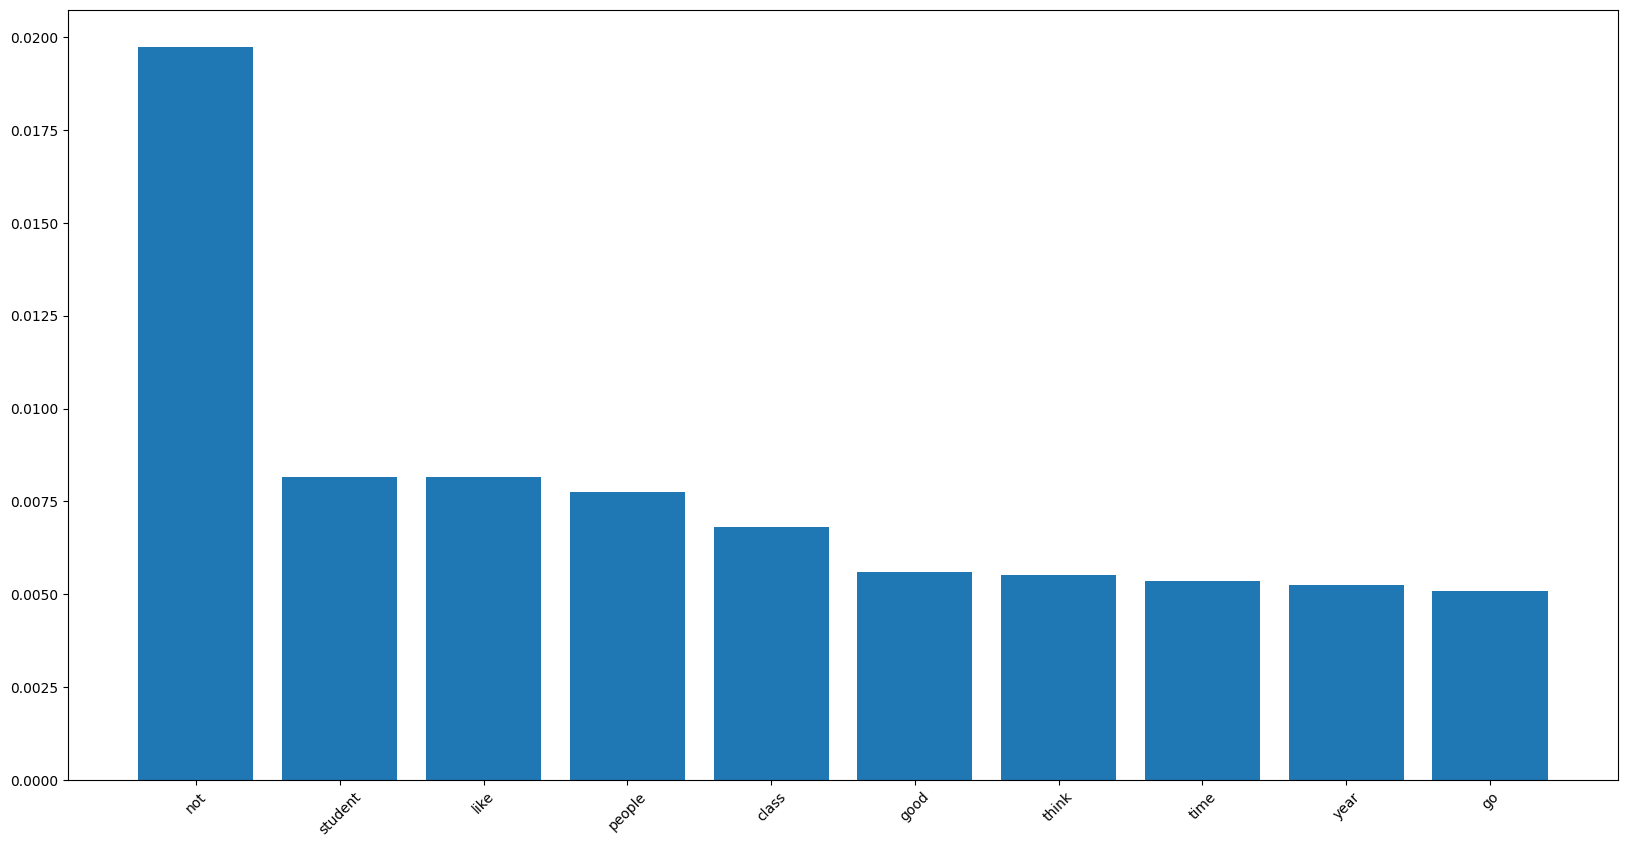

In [25]:
#we can plot the most common words
#we will only plot the top 10 words for readability
plot_list = word_counts.head(10)
plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.show()

In [26]:
#pandas allows us to access specific words in the series using the index
word_counts["student loan"]

4.1400153180566765e-05

In [27]:
#we can also use a list of words to compare and plot specific words
plot_list=word_counts[["history", "business", "computer science", "cs", "computer"]]
plot_list

history             0.000352
business            0.000600
computer science    0.000035
cs                  0.001228
computer            0.000262
dtype: float64

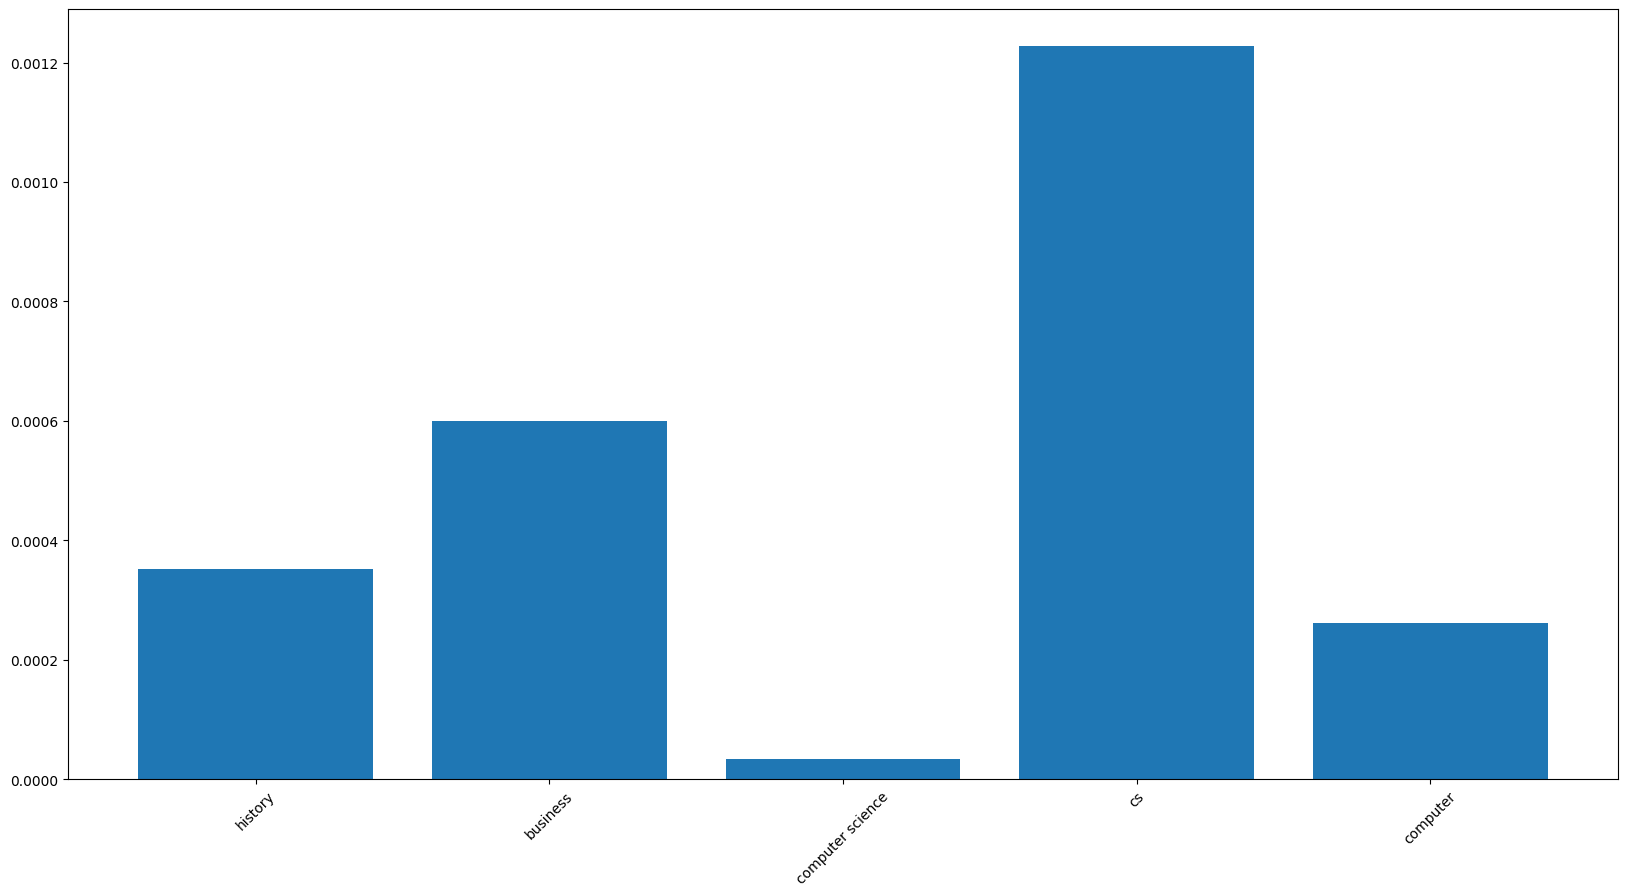

In [28]:

plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.show()

#### Question 2:

In [29]:
#TODO: pick 5 words that you find interesting or are curious about, and plot a bar plot of their frequency in this dataset 

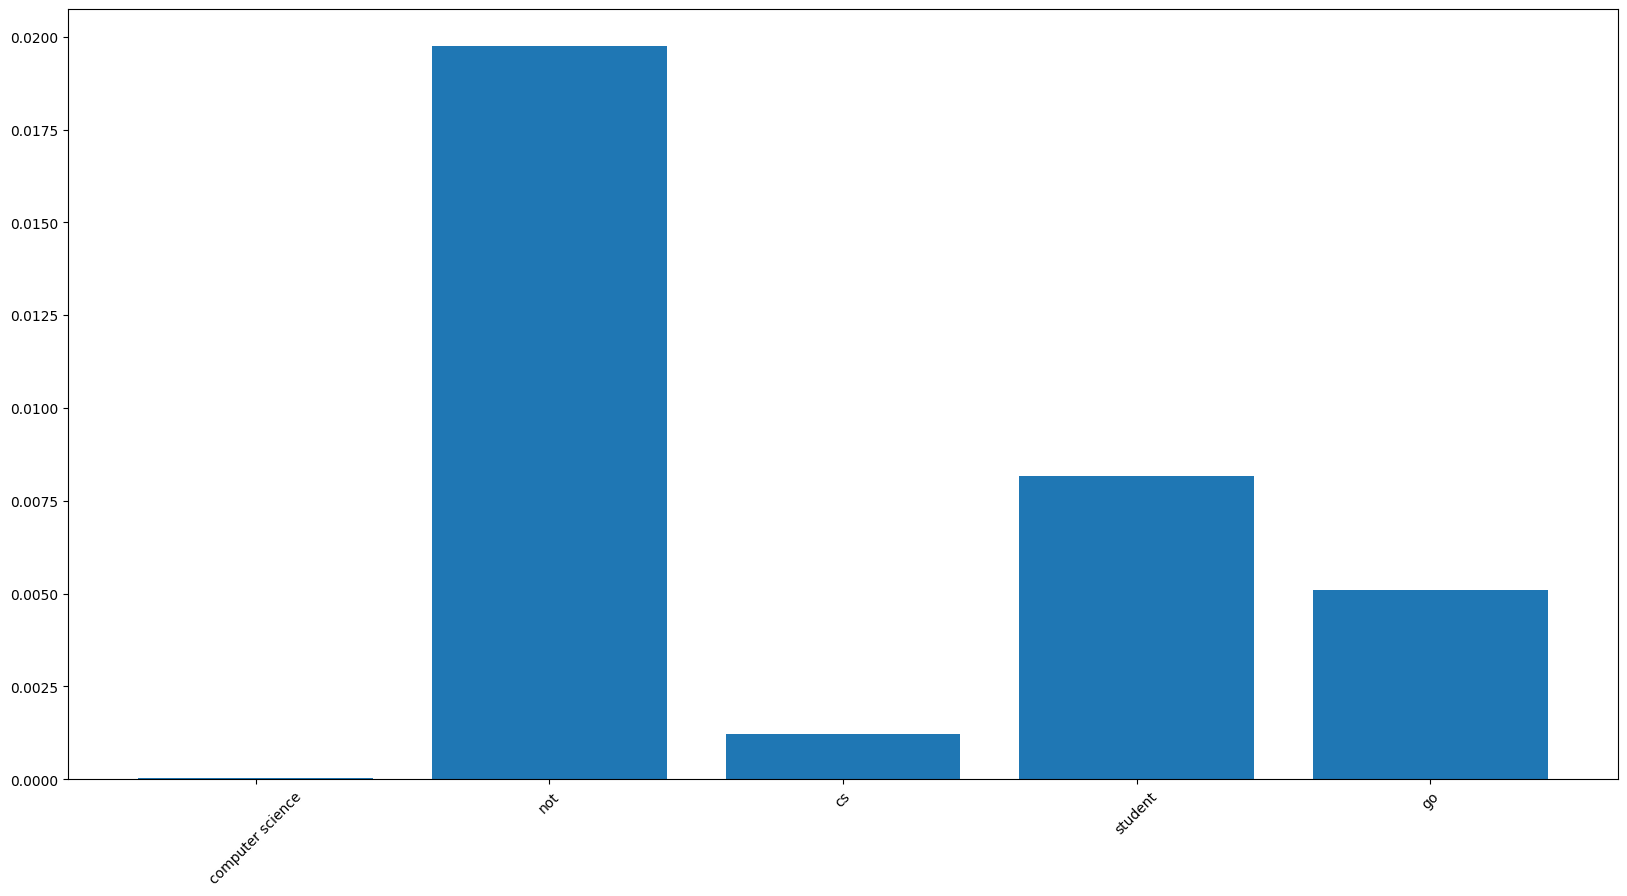

In [30]:
five_words = word_counts[['computer science', 'not', 'cs', 'student', 'go']]
five_words

plt.figure(figsize=(20,10))
plt.bar(five_words.index, five_words.values)
plt.xticks(rotation=45)
plt.show()

### Problem 2: repeat this process with the Illinois subreddit data (in this directory as "uiuc.csv"). You should not have to change too much in the previous code besides the dataframe path and name. Your notebook should include the two bar graphs including and excluding stopwords. Use the same 5 words and compare their relative frequency between the two subreddits. Discuss any interesting differences you notice in a short markdown cell. 

In [31]:
uiuc=pd.read_csv("uiuc.csv")
uiuc

,Unnamed: 0,date,post_votes,text,user,com_votes
0,0,2024-09-04 14:43:40,2,Have the same professor! And in lecture he did...,zhen3441,2
1,1,2024-09-04 14:43:40,2,Do you find it helpful to still go to the lect...,Kai2747,1
2,2,2024-09-04 12:52:08,3,Have you tried emailing University Housing to ...,TurboBKTastic,2
3,3,2024-09-04 12:52:08,3,Purchasing Illini Cash should get you added to...,HoosierCAB,2
4,4,2024-09-04 12:52:08,3,"Just did, thanks for the suggestion! It hadn't...",Sector-Both,1
...,...,...,...,...,...,...
4720,4720,2024-08-21 20:28:40,1,Im interested if you're still looking,Accomplished_Fix2409,0
4721,4721,2024-08-21 20:26:15,7,I went to one of the taylor nights. was quite ...,student176895,4
4722,4722,2024-08-21 20:21:54,10,"Hey, I’m so sorry to hear that’s happening. If...",OCCLUIUC,5
4723,4723,2024-08-21 20:21:54,10,"AFAIK, the “cleaning company” that UGroup empl...",perpetuallytired29,3


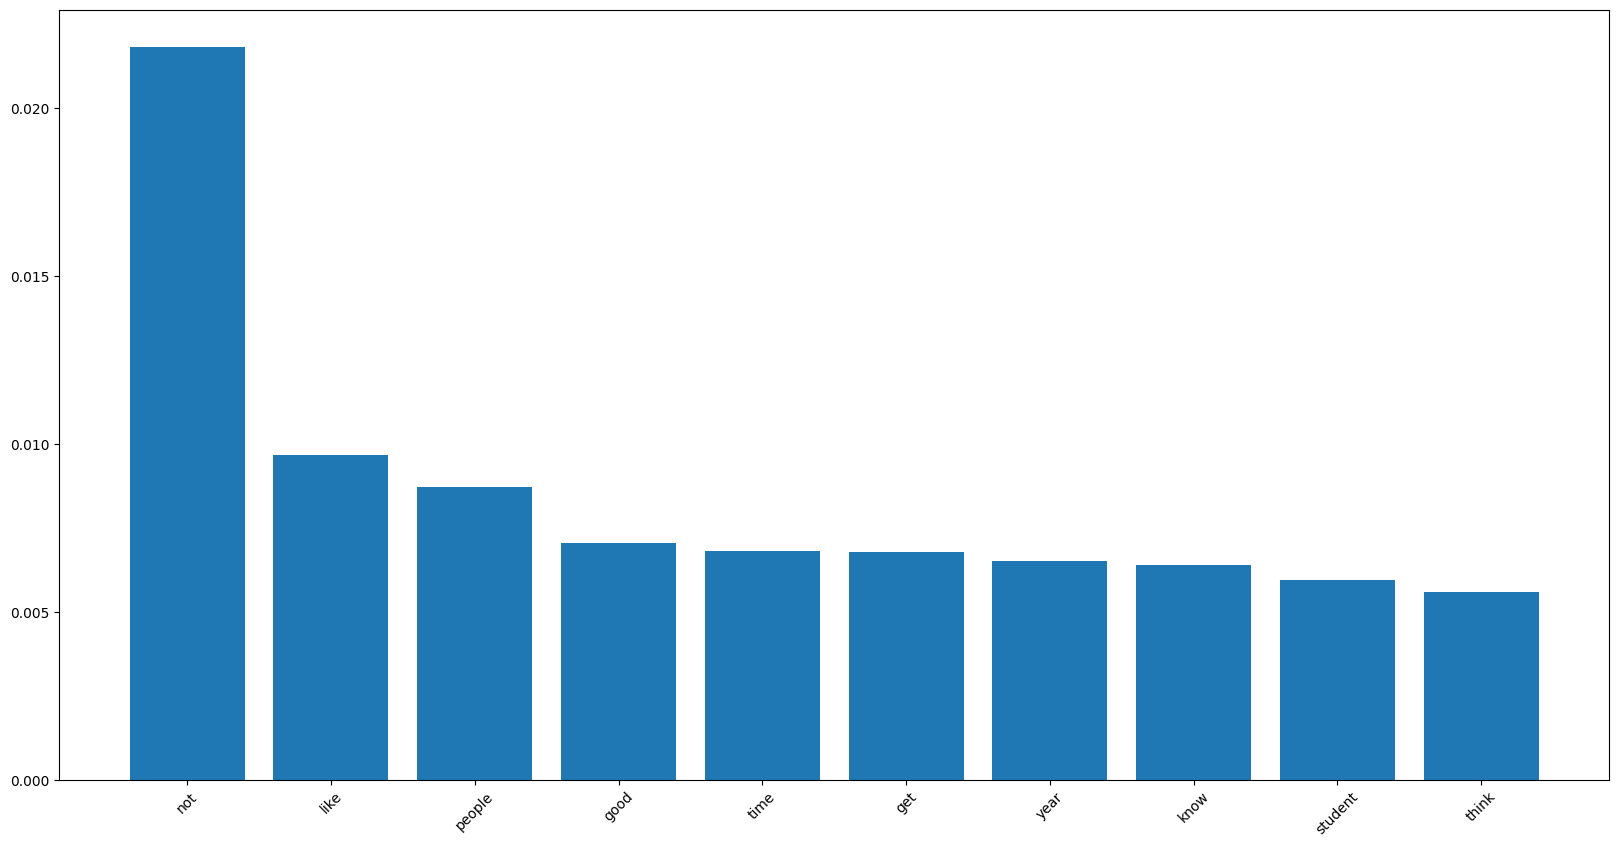

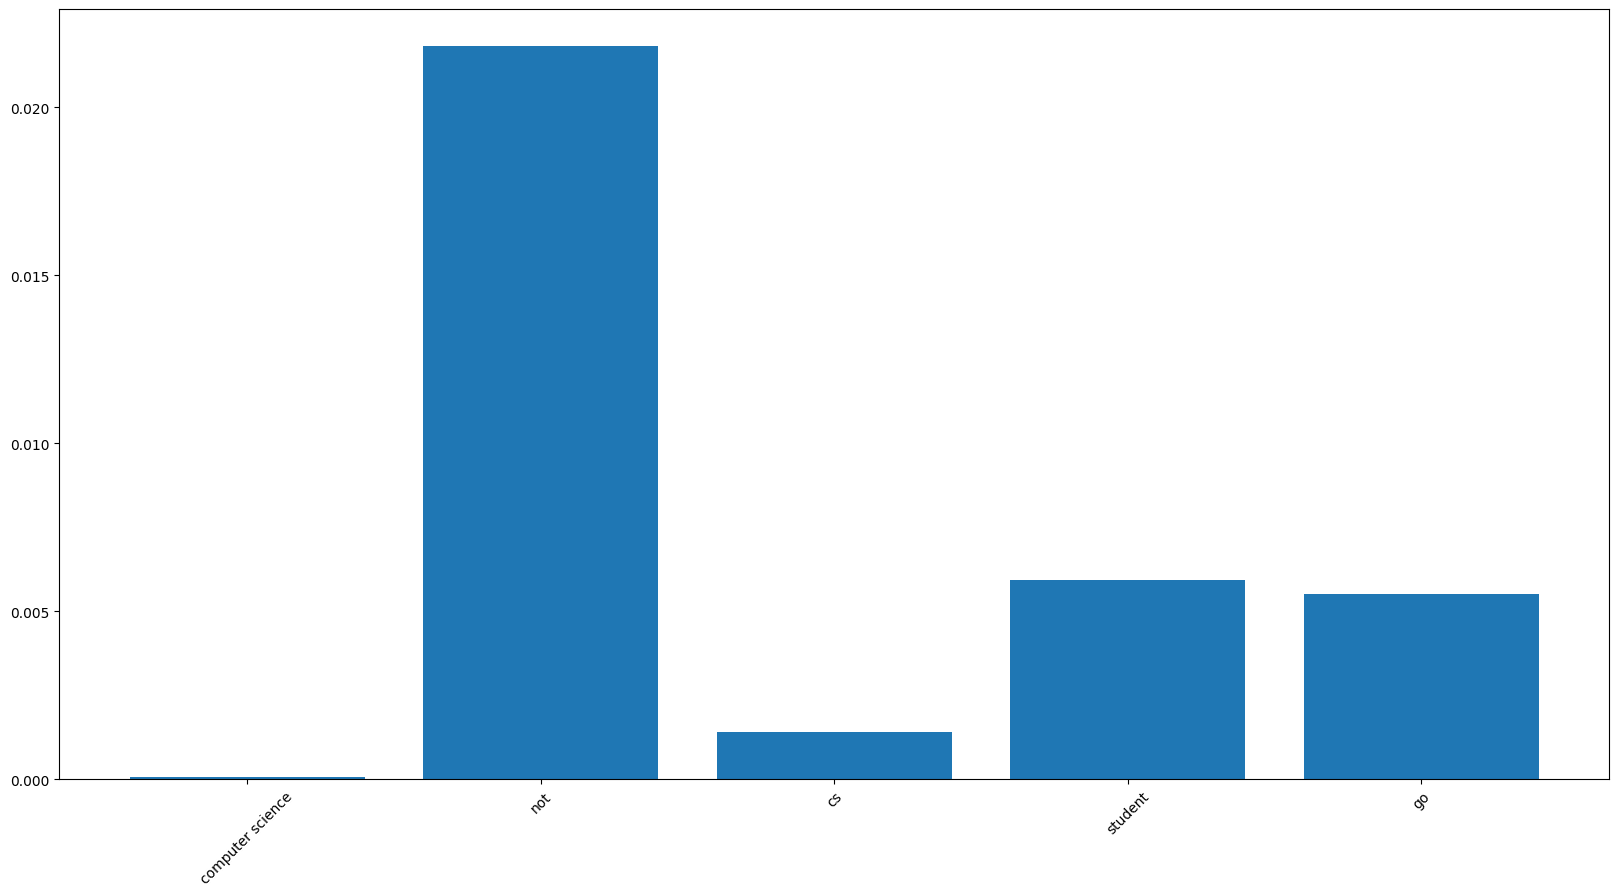

In [32]:
uiuc = pd.read_csv("uiuc.csv")


uiuc['cleaned_text'] = uiuc['text'].apply(clean)

uiuc['lemmatized_text'] = uiuc['cleaned_text'].apply(lemmatize)

vectorizer = CountVectorizer(min_df=3, max_df=0.3, ngram_range=(1,2))
bag_of_words_uiuc = vectorizer.fit_transform(uiuc['lemmatized_text'])

bow_df_uiuc = pd.DataFrame(bag_of_words_uiuc.toarray(), columns=vectorizer.get_feature_names_out())

word_counts_uiuc = bow_df_uiuc.sum()
word_counts_uiuc = word_counts_uiuc.sort_values(ascending=False)

word_counts_uiuc = word_counts_uiuc / word_counts_uiuc.sum()

plot_list_uiuc = word_counts_uiuc.head(10)
plt.figure(figsize=(20,10))
plt.bar(plot_list_uiuc.index, plot_list_uiuc.values)
plt.xticks(rotation=45)
plt.show()

five_words_uiuc = word_counts_uiuc[['computer science', 'not', 'cs', 'student', 'go']]
plt.figure(figsize=(20,10))
plt.bar(five_words_uiuc.index, five_words_uiuc.values)
plt.xticks(rotation=45)
plt.show()

This section is where I used the Copilot

### Problem 3: using the provided combined dataframe, train a logistic regression model using the sklearn Logistic Regression implementation. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html. Create a bag of words table from the combined data, and use that along with the "label" column to train the classifier. Please try this out and be prepared with issues or questions next Monday. We will be discussing in class

In [33]:
uiuc=pd.read_csv("uiuc.csv")
mich=pd.read_csv("umich.csv")

#sample so we have even number of samples from each dataset
mich=mich.sample(n=4725)

#assign labels based on origin subreddit of comment
uiuc['label']=1
mich['label']=0

#you will be working with the data csv for the rest of the question
data=pd.concat([uiuc,mich])

In [34]:
#clean and lemmatize the data csv
data['cleaned_text'] = data['text'].apply(clean)

data['lemmatized_text'] = data['cleaned_text'].apply(lemmatize)

In [35]:
#create a bag of words representation with count vectorizer
vectorizer = CountVectorizer(min_df=3, max_df=0.3, ngram_range=(1,2))

bag_of_words_data = vectorizer.fit_transform(data['lemmatized_text'])

In [36]:
from sklearn.linear_model import LogisticRegression

X = bag_of_words_data
y = data['label']

model = LogisticRegression(max_iter=1000)

model.fit(X, y)

LogisticRegression(max_iter=1000)

This is the part where I used Github Copilot.

In [37]:
#report the accuracy of the model
accuracy = model.score(X, y)
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.9037037037037037


This is the part where I used Github Copilot.

#### Part 2: hold out part of the dataset using sklearn train_test_split (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Pass in your previously generated bag of words as X and the label column as y. Use only the X_train and y_train for training and hold out the X_test and y_test to score the model on unseen data.

In [38]:
# what is the accuracy of the model? Is it better or worse than previous?Why do you think it has changed? 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

test_accuracy = model.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

Test Accuracy: 0.7222222222222222


This is the part where I used Github Copilot.

-----------------------------------------------------------------------------------------------------------------------------------

The accuracy of the model is 71.21% (the test accuracy is 0.7121693121693121). This is worst than the previous, because the previous accuracy is 90.01% (0.9001058201058201) while the accuracy of this is 71.21%. Therefore, 71.21% < 90.01% and is worst than the previous accuracy.

I think it changes because the previous dataset was because it went through the coding process of leminization and removal of stopword. In this dataset, what is done is involved only with the X_train and y_train for training and hold out the X_test and y_test. Therefore, the testing is different and results in the difference in the accuracy.

#### Part 3: Examine the top features of your model using the following code

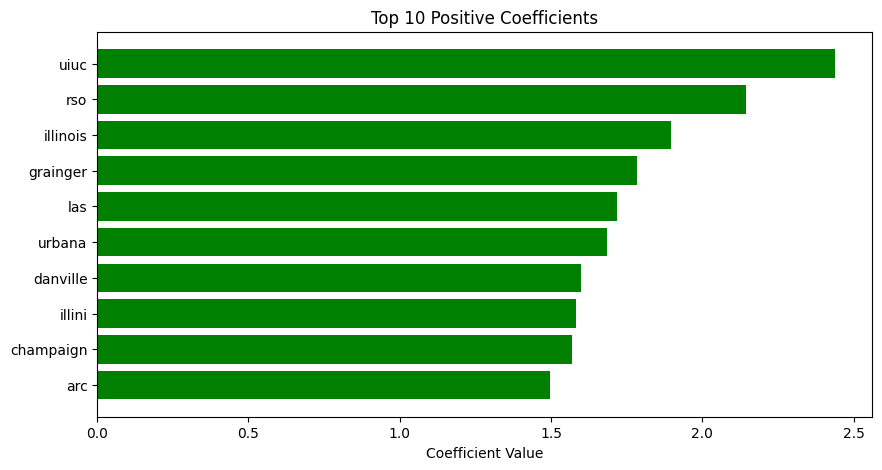

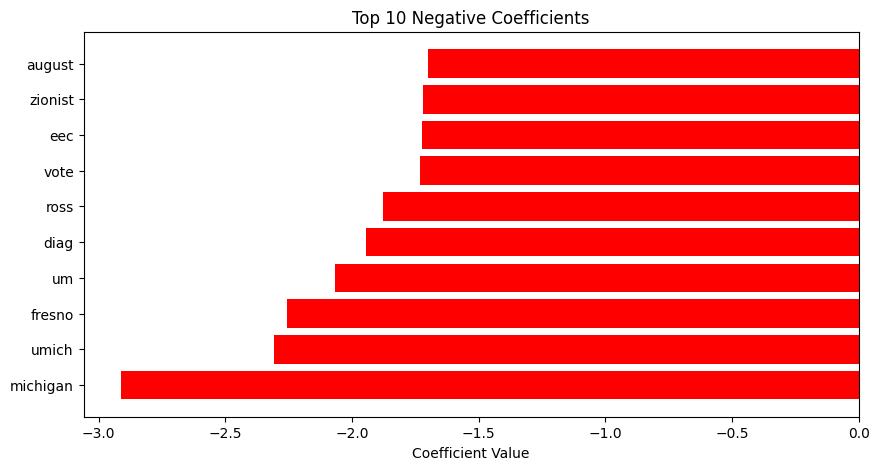

In [39]:
#get the coefficients of the model and plot the top 10 most positive and top 10 most negative coefficients
#what do you notice about these words? Are they surprising or expected?
feature_names = vectorizer.get_feature_names_out()

coefficients = model.coef_[0]

coefficients_df = pd.DataFrame({'feature': feature_names, 'coefficient': coefficients})

coefficients_df = coefficients_df.sort_values('coefficient', ascending=False)

top_10_positive = coefficients_df.head(10)
top_10_negative = coefficients_df.tail(10)

plt.figure(figsize=(10, 5))
plt.barh(top_10_positive['feature'], top_10_positive['coefficient'], color='green')
plt.xlabel('Coefficient Value')
plt.title('Top 10 Positive Coefficients')
plt.gca().invert_yaxis()
plt.show()

plt.figure(figsize=(10, 5))
plt.barh(top_10_negative['feature'], top_10_negative['coefficient'], color='red')
plt.xlabel('Coefficient Value')
plt.title('Top 10 Negative Coefficients')
plt.gca().invert_yaxis()
plt.show()

This is the secion where I used Github Copilot.

In [40]:
coefficients = pd.DataFrame({'feature': feature_names, 'coefficient': model.coef_[0]})
coefficients = coefficients.sort_values('coefficient', ascending=False)
top_10_positive = coefficients.head(10)
top_10_negative = coefficients.tail(10)

#coefficients = pd.DataFrame({'feature': X.columns, 'coefficient': model.coef_[0]})


#coefficients = coefficients.sort_values('coefficient', ascending=False)


#top_10_positive = coefficients.head(10)


#top_10_negative = coefficients.tail(10)


I do not know why, but there is an error in the code. I just redid it and changes the X.columns with feature_names.

In [41]:
print("Top 10 Positive Coefficients:")
print(top_10_positive)

print("\nTop 10 Negative Coefficients:")
print(top_10_negative)

positive_words = top_10_positive['feature'].tolist()
negative_words = top_10_negative['feature'].tolist()

print("\nExamples of comments containing top positive words:")
for word in positive_words:
    print(f"\nComments containing '{word}':")
    print(data[data['lemmatized_text'].str.contains(word, case=False, na=False)]['text'].head(3).tolist())

print("\nExamples of comments containing top negative words:")
for word in negative_words:
    print(f"\nComments containing '{word}':")
    print(data[data['lemmatized_text'].str.contains(word, case=False, na=False)]['text'].head(3).tolist())

Top 10 Positive Coefficients:
        feature  coefficient
7763       uiuc     2.439738
6242        rso     2.143827
3350   illinois     1.897470
2913   grainger     1.782877
3759        las     1.718398
7878     urbana     1.683835
1549   danville     1.597670
3347     illini     1.583903
942   champaign     1.568472
329         arc     1.497669

Top 10 Negative Coefficients:
       feature  coefficient
440     august    -1.698648
8458   zionist    -1.718884
1984       eec    -1.722369
8025      vote    -1.732161
6229      ross    -1.876946
1724      diag    -1.942604
7770        um    -2.067586
2541    fresno    -2.255075
7772     umich    -2.306575
4422  michigan    -2.913665

Examples of comments containing top positive words:

Comments containing 'uiuc':
["Brother bear; I aint butthurt.\n\nIm a former engineer alum, and i worked for the grainger library once upon a time.\n\nMy comment is not a slight against you nor engineers at uiuc, rather it was commentary on the pressure that 

This section is where I used Github Copilot.

### Problem 4: Train a 10 topic topic model from the UIUC subreddit data using Gensim LDA. (https://radimrehurek.com/gensim/auto_examples/tutorials/run_lda.html) If you get here before Wednesday 9/11, don't rush to finish, but feel free to continue ahead. We will go through this in class. Print out the top words in each topic, and read through the words for each topic to decide the theme of the topic: remember this is subjective and there are no right or wrong answers. Print out a few comments with high frequencies of each topic and analyze if your topic labels were representative. 

In [42]:
!pip install gensim

In [43]:
import numpy

In [44]:
!pip install numpy==1.26.4 --ignore-installed numpy

  Using cached numpy-1.26.4-cp39-cp39-macosx_11_0_arm64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp39-cp39-macosx_11_0_arm64.whl (14.0 MB)


In [45]:
from gensim import corpora
from gensim.models import LdaModel
from gensim.matutils import Sparse2Corpus

# Convert the bag of words matrix to a Gensim corpus
corpus_uiuc = Sparse2Corpus(bag_of_words_uiuc, documents_columns=False)

# Create a dictionary from the vectorizer's vocabulary
id2word_uiuc = dict((v, k) for k, v in vectorizer.vocabulary_.items())

# Train the LDA model
lda_model_uiuc = LdaModel(corpus=corpus_uiuc, id2word=id2word_uiuc, num_topics=10, random_state=42, passes=10)

# Print out the top words in each topic
for i, topic in lda_model_uiuc.print_topics(num_words=10):
    print(f"Topic {i}: {topic}")

# Analyze comments with high frequencies of each topic
for i in range(10):
    print(f"\nComments with high frequencies of Topic {i}:")
    topic_comments = []
    for j, row in enumerate(corpus_uiuc):
        if lda_model_uiuc.get_document_topics(row, minimum_probability=0.1)[0][0] == i:
            topic_comments.append(uiuc['text'].iloc[j])
    print(topic_comments[:3])  # Print the first 3 comments for each topic

Topic 0: 0.025*"football team" + 0.024*"expectation" + 0.022*"come late" + 0.014*"class worth" + 0.013*"issue ve" + 0.013*"disrupt event" + 0.013*"click link" + 0.012*"connect" + 0.011*"intellectual" + 0.011*"despite"
Topic 1: 0.027*"bad weather" + 0.026*"expectation" + 0.019*"cone" + 0.014*"ill go" + 0.011*"coursework" + 0.010*"internal" + 0.010*"garden" + 0.010*"intellectual" + 0.010*"leak" + 0.010*"league"
Topic 2: 0.057*"lab attendance" + 0.012*"avail" + 0.010*"document" + 0.010*"hopefully help" + 0.009*"junk" + 0.008*"illinois attorney" + 0.008*"aside" + 0.008*"cool people" + 0.007*"draft" + 0.007*"clear"
Topic 3: 0.051*"indirect" + 0.015*"atm" + 0.013*"bell" + 0.012*"leverage" + 0.011*"draft" + 0.011*"average student" + 0.010*"fire" + 0.010*"barely" + 0.009*"baseball" + 0.009*"expectation"
Topic 4: 0.019*"expectation" + 0.016*"inquiry" + 0.014*"ambulance" + 0.014*"large" + 0.012*"grade not" + 0.011*"budget" + 0.010*"disrupt event" + 0.007*"ae" + 0.006*"day day" + 0.006*"document"

In [46]:
!pip3 uninstall numpy==2.2.2 --yes

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4


In [47]:
!conda uninstall numpy --yes


PackagesNotFoundError: The following packages are missing from the target environment:
  - numpy




In [48]:
import numpy
numpy.__version__

'1.26.4'

The comments that have high frequencies comment is

## Sources that I used.

The sources that I used is the Github Copilot that helped me with the codes.

I have noted which part that I used for the Github Copilot.